In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})

BIG_SIZE = 14
BIGGER_SIZE = 16
BIGGEST_SIZE = 20

matplotlib.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=BIGGEST_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

In [2]:
data = np.load('./l2_error_pattern_cor_data/det_vs_adap_vs_truth_t27_to_t45.npz')

In [3]:
# deterministic vs truth; l2 error comparison
l2_temp_det_v_truth = data['l2_temp_det_v_truth']
l2_vort_det_v_truth = data['l2_vort_det_v_truth']
l2_vel_det_v_truth = data['l2_vel_det_v_truth']

In [4]:
l2_temp_det_v_truth.size, l2_vort_det_v_truth.shape

(19, (19,))

In [5]:
# deterministic vs truth; pattern correrlation
pc_temp_det_v_truth = data['pc_temp_det_v_truth']
pc_vort_det_v_truth = data['pc_vort_det_v_truth']

In [6]:
# adapted sol. vs truth; l2 error comparison
l2_temp_adap_v_truth = data['l2_temp_adap_v_truth']
l2_vort_adap_v_truth = data['l2_vort_adap_v_truth']
l2_vel_adap_v_truth = data['l2_vel_adap_v_truth']


In [7]:
# adapted sol. vs truth; pattern correlation
pc_temp_adap_v_truth = data['pc_temp_adap_v_truth']
pc_vort_adap_v_truth = data['pc_vort_adap_v_truth']

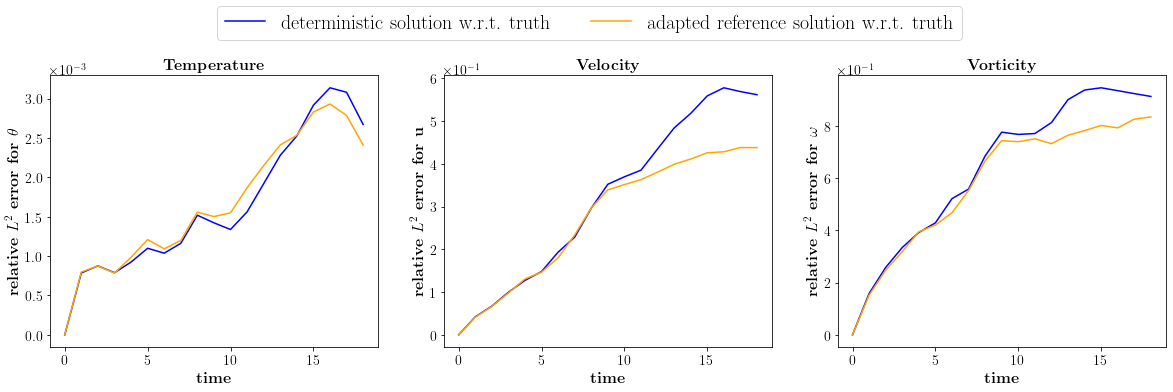

In [17]:
# plots; l2 error comparison
fig, ax = plt.subplots(1,3,figsize=(20, 5)) # one can try this also: layout="constrained"
# fig.suptitle(r'Relative $L^2$ error comparison', fontsize=16)
c1 ='blue'
c2 = 'orange'
ax[0].set_title(r'\bf Temperature')
ax[0].plot(np.arange(l2_temp_det_v_truth.size), l2_temp_det_v_truth, color=c1, label='deterministic solution w.r.t. truth')
ax[0].plot(np.arange(l2_temp_adap_v_truth.size), l2_temp_adap_v_truth, color=c2, label='adapted reference solution w.r.t. truth')
ax[0].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax[0].set_xlabel(r'\bf{time}')
ax[0].set_ylabel(r'\bf {relative} $L^2$ {error for} $\theta$')
# ax[0].set_xlim([0, 18]) 
# ax[0].legend()

ax[1].set_title(r'\bf Velocity')
ax[1].plot(np.arange(l2_vel_det_v_truth.size), l2_vel_det_v_truth, color=c1, label='deterministic solution w.r.t. truth')
ax[1].plot(np.arange(l2_vel_adap_v_truth.size), l2_vel_adap_v_truth, color=c2, label='adapted solution w.r.t. truth')
ax[1].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax[1].set_xlabel(r'\bf{time}')
ax[1].set_ylabel(r'\bf {relative} $L^2$ {error for} $\mathbf{u}$')
# ax[1].set_xlim([0, 18]) 
# ax[1].legend()

ax[2].set_title(r'\bf Vorticity')
ax[2].plot(np.arange(l2_vort_det_v_truth.size), l2_vort_det_v_truth, color=c1, label='deterministic solution w.r.t. truth')
ax[2].plot(np.arange(l2_vort_adap_v_truth.size), l2_vort_adap_v_truth, color=c2, label='adapted reference solution w.r.t. truth')
ax[2].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax[2].set_xlabel(r'\bf{time}')
ax[2].set_ylabel(r'\bf {relative} $L^2$ {error for} $\omega$')
# ax[2].set_xlim([0, 18]) 
# ax[2].legend()
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)
plt.savefig('../plots/l2_error_comparison_det_adap_mesh32.pdf',bbox_inches='tight')

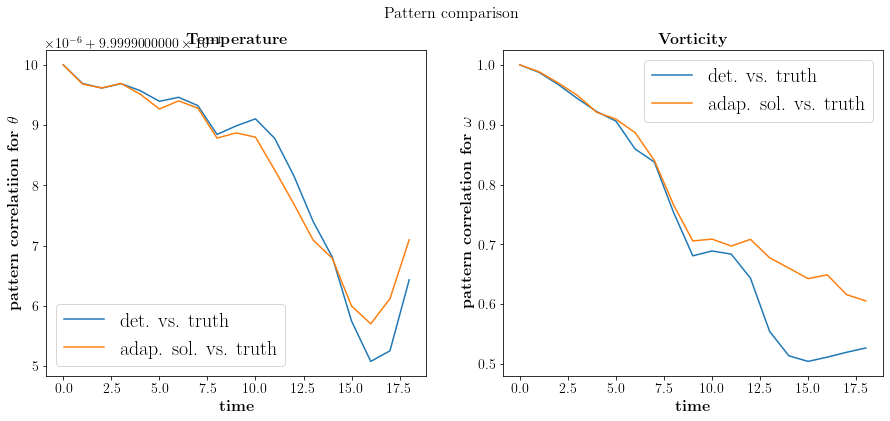

In [19]:
# plots; pattern correlation comparison
fig, ax = plt.subplots(1,2,figsize=(15, 6)) # one can try this also: layout="constrained"
fig.suptitle(r'Pattern comparison', fontsize=16)
ax[0].set_title(r'\bf Temperature')
ax[0].plot(np.arange(pc_temp_det_v_truth.size), pc_temp_det_v_truth, label='det. vs. truth')
ax[0].plot(np.arange(pc_temp_adap_v_truth.size), pc_temp_adap_v_truth, label='adap. sol. vs. truth')
# ax[0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True)) 
ax[0].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax[0].set_xlabel(r'\bf{time}')
ax[0].set_ylabel(r'\bf {pattern correlatiion for} $\theta$')
ax[0].legend()
ax[1].set_title(r'\bf Vorticity')
ax[1].plot(np.arange(pc_vort_det_v_truth.size), pc_vort_det_v_truth, label='det. vs. truth')
ax[1].plot(np.arange(pc_vort_adap_v_truth.size), pc_vort_adap_v_truth, label='adap. sol. vs. truth')
ax[1].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax[1].set_xlabel(r'\bf{time}')
ax[1].set_ylabel(r'\bf {pattern correlation for} $\omega$')
ax[1].legend()

The y tick label of temperature looks weird because the correlation values are very close to 1. See the data below. This is kind of expected because the temperature fields do not change much over time.

In [11]:
print(pc_temp_adap_v_truth), print(pc_temp_det_v_truth)

[1.         0.99999968 0.99999962 0.99999969 0.99999951 0.99999927
 0.9999994  0.99999928 0.99999879 0.99999887 0.9999988  0.99999826
 0.99999769 0.99999709 0.99999679 0.999996   0.9999957  0.99999612
 0.9999971 ]
[1.         0.99999969 0.99999962 0.99999969 0.99999957 0.9999994
 0.99999946 0.99999932 0.99999885 0.99999899 0.9999991  0.99999878
 0.99999816 0.9999974  0.99999681 0.99999575 0.99999508 0.99999526
 0.99999643]


(None, None)